## 1. Ładowanie bibliotek

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.layers import Conv2D,InputLayer, Dropout, BatchNormalization, Flatten, Dense, MaxPooling2D
from tensorflow.keras import utils
from tensorflow.keras.models import Sequential
from tensorflow.random import set_seed


In [2]:
from tensorflow.keras import layers
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

## 2. Eksploracja danych

In [3]:
df=pd.read_csv('Dane/age_gender.csv')

In [4]:
df.head()

,age,ethnicity,gender,img_name,pixels
0,1,2,0,20161219203650636.jpg.chip.jpg,129 128 128 126 127 130 133 135 139 142 145 14...
1,1,2,0,20161219222752047.jpg.chip.jpg,164 74 111 168 169 171 175 182 184 188 193 199...
2,1,2,0,20161219222832191.jpg.chip.jpg,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,1,2,0,20161220144911423.jpg.chip.jpg,193 197 198 200 199 200 202 203 204 205 208 21...
4,1,2,0,20161220144914327.jpg.chip.jpg,202 205 209 210 209 209 210 211 212 214 218 21...


In [5]:
df.describe()

,age,ethnicity,gender
count,23705.000000,23705.000000,23705.000000
mean,33.300907,1.269226,0.477283
std,19.885708,1.345638,0.499494
min,1.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000
50%,29.000000,1.000000,0.000000
75%,45.000000,2.000000,1.000000
max,116.000000,4.000000,1.000000


In [6]:
df.shape

(23705, 5)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23705 entries, 0 to 23704
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        23705 non-null  int64 
 1   ethnicity  23705 non-null  int64 
 2   gender     23705 non-null  int64 
 3   img_name   23705 non-null  object
 4   pixels     23705 non-null  object
dtypes: int64(3), object(2)
memory usage: 926.1+ KB


<AxesSubplot:>

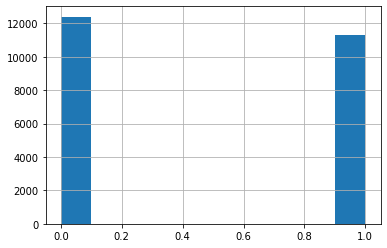

In [8]:
df['gender'].hist()

In [9]:
df['gender'].value_counts()

0    12391
1    11314
Name: gender, dtype: int64

<AxesSubplot:>

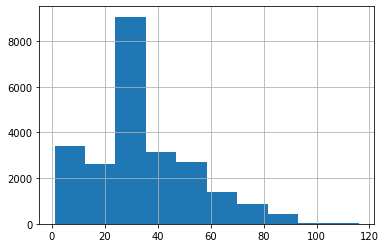

In [10]:
df['age'].hist()

In [11]:
df['age'].value_counts()

26     2197
1      1123
28      918
35      880
24      859
       ... 
115       3
101       2
91        2
103       1
111       1
Name: age, Length: 104, dtype: int64

<AxesSubplot:>

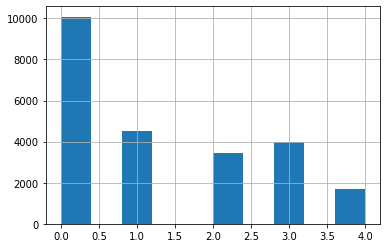

In [12]:
df['ethnicity'].hist()

In [13]:
df['ethnicity'].value_counts()

0    10078
1     4526
3     3975
2     3434
4     1692
Name: ethnicity, dtype: int64

## 3. Wizualizacja danych

### 3.1. Podział z uwagi na płeć

In [14]:
df['pixels']=df['pixels'].apply(lambda x:  np.array(x.split(), dtype="float32"))

In [15]:
xModel = np.array(df['pixels'].tolist())

In [16]:
xModel = xModel.reshape(xModel.shape[0], 48, 48, 1)

[]

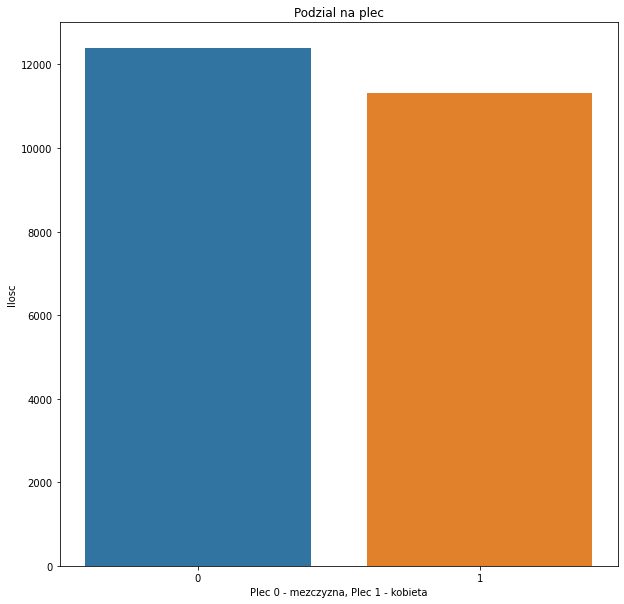

In [17]:
plt.figure(figsize=(10,10))

sns.countplot(x='gender',data=df)
plt.xlabel('Plec 0 - mezczyzna, Plec 1 - kobieta')
plt.ylabel('Ilosc')
plt.title('Podzial na plec') 
plt.plot()

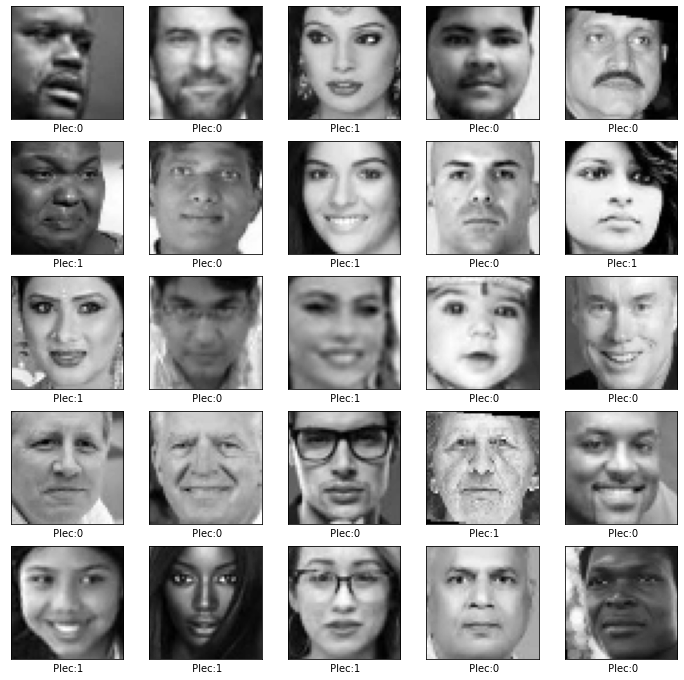

In [18]:
index=np.random.randint(0,23704,25)
plt.figure(figsize=(12,12))

for i in range(len(index)):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(xModel[index[i]], cmap="gray")
    plt.xlabel(" Plec:"+str(df['gender'].iloc[index[i]]))
   

    
plt.show()

# 5. Podział na zbiór testowy i treningowy

In [19]:
x = xModel
y = df['gender']

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [21]:
y_train = tf.keras.utils.to_categorical(y_train, 2)
y_test = tf.keras.utils.to_categorical(y_test, 2)

In [22]:
x_train.shape

(18964, 48, 48, 1)

In [23]:
y_train.shape

(18964, 2)

In [24]:
x_test.shape

(4741, 48, 48, 1)

In [25]:
y_test.shape

(4741, 2)

In [26]:
x_train[1]

array([[[197.],
        [197.],
        [196.],
        ...,
        [124.],
        [136.],
        [136.]],

       [[191.],
        [194.],
        [193.],
        ...,
        [134.],
        [136.],
        [139.]],

       [[185.],
        [194.],
        [191.],
        ...,
        [144.],
        [136.],
        [139.]],

       ...,

       [[ 34.],
        [ 34.],
        [ 22.],
        ...,
        [133.],
        [136.],
        [138.]],

       [[ 39.],
        [ 44.],
        [ 30.],
        ...,
        [134.],
        [137.],
        [145.]],

       [[ 44.],
        [ 40.],
        [ 29.],
        ...,
        [138.],
        [142.],
        [146.]]], dtype=float32)

# 6. Tworzenie modeli

## 6.1 Model nr 05 - najlepszy

In [68]:
model05 = tf.keras.Sequential()
model05.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)))
model05.add(layers.BatchNormalization())
model05.add(layers.MaxPooling2D((2, 2)))
model05.add(layers.Dropout(0.25))

model05.add(layers.Conv2D(64, (3, 3), activation='relu'))
model05.add(layers.BatchNormalization())
model05.add(layers.MaxPooling2D((2, 2)))
model05.add(layers.Dropout(0.25))
model05.add(layers.Conv2D(128, (3, 3), activation='relu'))
model05.add(layers.BatchNormalization())
model05.add(layers.MaxPooling2D((2, 2)))
model05.add(layers.Dropout(0.25))

model05.add(layers.Flatten())
model05.add(layers.Dense(64, activation='relu'))
model05.add(layers.Dense(2, activation='softmax'))

model05.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 46, 46, 32)        320       
_________________________________________________________________
batch_normalization_9 (Batch (None, 46, 46, 32)        128       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 21, 21, 64)        18496     
_________________________________________________________________
batch_normalization_10 (Batc (None, 21, 21, 64)        256       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 10, 10, 64)       

In [69]:
model05.compile(optimizer='Adam',loss='categorical_crossentropy', metrics=['accuracy'])

In [70]:
history05 = model05.fit(
    x=x_train,
    y=y_train,
    batch_size=100,
    epochs=15,
    validation_split=0.05
)

Epoch 1/15
181/181 [==============================] - 35s 191ms/step - loss: 0.5679 - accuracy: 0.7351 - val_loss: 0.3807 - val_accuracy: 0.8114
Epoch 2/15
181/181 [==============================] - 33s 183ms/step - loss: 0.3760 - accuracy: 0.8241 - val_loss: 0.2940 - val_accuracy: 0.8641
Epoch 3/15
181/181 [==============================] - 32s 179ms/step - loss: 0.3301 - accuracy: 0.8486 - val_loss: 0.2783 - val_accuracy: 0.8757
Epoch 4/15
181/181 [==============================] - 32s 179ms/step - loss: 0.3021 - accuracy: 0.8651 - val_loss: 0.2688 - val_accuracy: 0.8778
Epoch 5/15
181/181 [==============================] - 32s 179ms/step - loss: 0.2831 - accuracy: 0.8714 - val_loss: 0.2638 - val_accuracy: 0.8736
Epoch 6/15
181/181 [==============================] - 32s 179ms/step - loss: 0.2659 - accuracy: 0.8823 - val_loss: 0.2471 - val_accuracy: 0.8883
Epoch 7/15
181/181 [==============================] - 32s 179ms/step - loss: 0.2495 - accuracy: 0.8875 - val_loss: 0.2557 - val_ac

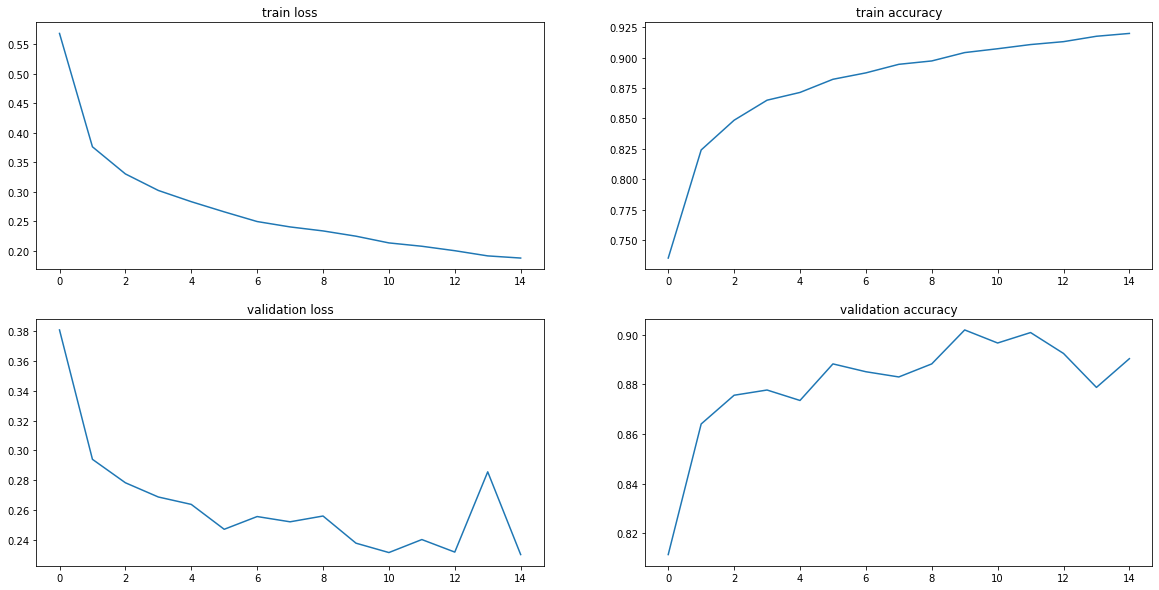

              precision    recall  f1-score   support

           0       0.93      0.86      0.89      2468
           1       0.86      0.93      0.89      2273

    accuracy                           0.89      4741
   macro avg       0.90      0.90      0.89      4741
weighted avg       0.90      0.89      0.89      4741

[[2131  337]
 [ 164 2109]]
Wyjścia po treningu 10 epok:
[1 0 0 0 0]

Referencyjne wyjścia:
[1 0 0 0 0]


In [71]:
fig, ax = plt.subplots(nrows=2,ncols=2, figsize=(20,10))
# wyświetlamy wykresy
ax[0][0].plot(history05.history["loss"])
ax[0][1].plot(history05.history["accuracy"])
ax[1][0].plot(history05.history["val_loss"])
ax[1][1].plot(history05.history["val_accuracy"])
#nazywamy zdjęcia
ax[0][0].set_title("train loss")
ax[0][1].set_title("train accuracy")
ax[1][0].set_title("validation loss")
ax[1][1].set_title("validation accuracy")
plt.show()

# testowanie
y_pred05 = model05.predict(x_test)
print(classification_report(y_test.argmax(axis=1), y_pred05.argmax(axis=1)))
print(confusion_matrix(y_test.argmax(axis=1), y_pred05.argmax(axis=1)))

print("Wyjścia po treningu {0} epok:\n{1}\n\nReferencyjne wyjścia:\n{2}".format(
    10, 
    y_pred05[:5].argmax(axis=1), 
    y_test[:5].argmax(axis=1)))

### Komentarz: model bez overfitting, f1 score =0.9 / 0.9, val_accur = 0.8946 - najlepszy model


# 7. Wizualizacja zdjęc, które nie zostały rozpoznane

In [72]:
labels = ['mezczyzna',
        'kobieta']

y_pred_classes = np.argmax(y_pred05, axis=1) 
y_true = np.argmax(y_test, axis=1)
errors = (y_pred_classes - y_true != 0)

y_pred_classes_errors = y_pred_classes[errors]
y_pred_errors = y_pred05[errors]
y_true_errors = y_true[errors]
y_test_errors = x_test[errors]

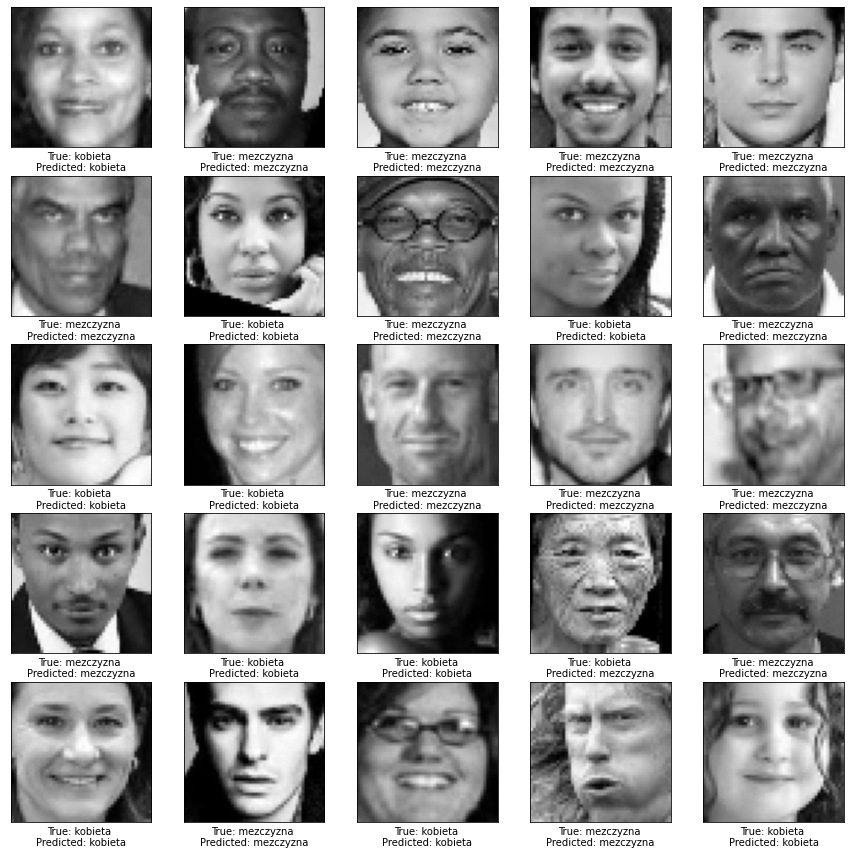

In [73]:
seed = 123
index=np.random.randint(0,10000,25)

plt.figure(figsize=(15,15))

for i in range(len(index)):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[i], cmap ="gray")
    plt.xlabel("True: %s \nPredicted: %s" % (labels[y_true[i]],labels[y_pred_classes[i]]))
   

    
plt.show()

### Model mniej radzi sobie z rozpoznaniem twarzy dzieci oraz strarszych osób

# 8 Redukcja zbioru danych, odciecie wieku <20 L i > 60 L
## 8.1 Utworzenie nowego zbioru testowego

In [35]:
df.head()

,age,ethnicity,gender,img_name,pixels
0,1,2,0,20161219203650636.jpg.chip.jpg,"[129.0, 128.0, 128.0, 126.0, 127.0, 130.0, 133..."
1,1,2,0,20161219222752047.jpg.chip.jpg,"[164.0, 74.0, 111.0, 168.0, 169.0, 171.0, 175...."
2,1,2,0,20161219222832191.jpg.chip.jpg,"[67.0, 70.0, 71.0, 70.0, 69.0, 67.0, 70.0, 79...."
3,1,2,0,20161220144911423.jpg.chip.jpg,"[193.0, 197.0, 198.0, 200.0, 199.0, 200.0, 202..."
4,1,2,0,20161220144914327.jpg.chip.jpg,"[202.0, 205.0, 209.0, 210.0, 209.0, 209.0, 210..."


In [36]:
Warunek1 = df['age']>20

In [37]:
Warunek2 = df['age']<60

In [38]:
df1=df[Warunek1]

In [39]:
df2=df1[Warunek2]

<ipython-input-39-4539ac2fa209>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df2=df1[Warunek2]


In [40]:
df2.head()

,age,ethnicity,gender,img_name,pixels
3452,21,0,0,20170116215442146.jpg.chip.jpg,"[5.0, 5.0, 5.0, 5.0, 6.0, 8.0, 6.0, 6.0, 6.0, ..."
3453,21,0,0,20170116215444801.jpg.chip.jpg,"[86.0, 84.0, 50.0, 58.0, 56.0, 56.0, 58.0, 56...."
3454,21,0,0,20170116215656696.jpg.chip.jpg,"[4.0, 5.0, 6.0, 6.0, 6.0, 6.0, 4.0, 4.0, 5.0, ..."
3455,21,0,0,20170116225141614.jpg.chip.jpg,"[54.0, 53.0, 52.0, 51.0, 49.0, 52.0, 60.0, 67...."
3456,21,0,0,20170117141432129.jpg.chip.jpg,"[82.0, 95.0, 111.0, 126.0, 135.0, 141.0, 142.0..."


<AxesSubplot:>

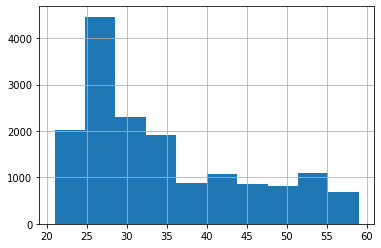

In [41]:
df2['age'].hist()

In [44]:
xModel2 = np.array(df2['pixels'].tolist())
xModel2 = xModel2.reshape(xModel2.shape[0], 48, 48, 1)

In [45]:
xModel2.shape

(16140, 48, 48, 1)

In [46]:
df2['age'].shape

(16140,)

In [47]:
x2 = xModel2
y2 = df2['gender']

In [48]:
x2.shape

(16140, 48, 48, 1)

In [49]:
y2.shape

(16140,)

In [50]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(x2,y2, test_size=0.2, random_state=42)

In [51]:
y_train2 = tf.keras.utils.to_categorical(y_train2, 2)
y_test2 = tf.keras.utils.to_categorical(y_test2, 2)

In [52]:
x_train2.shape

(12912, 48, 48, 1)

In [53]:
y_train2.shape

(12912, 2)

In [54]:
x_test2.shape

(3228, 48, 48, 1)

In [55]:
y_test2.shape

(3228, 2)

## 8.2 Na bazie modelu nr 5

In [56]:
model07 = tf.keras.Sequential()
model07.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)))
model07.add(layers.BatchNormalization())
model07.add(layers.MaxPooling2D((2, 2)))
model07.add(layers.Dropout(0.25))

model07.add(layers.Conv2D(64, (3, 3), activation='relu'))
model07.add(layers.BatchNormalization())
model07.add(layers.MaxPooling2D((2, 2)))
model07.add(layers.Dropout(0.25))
model07.add(layers.Conv2D(128, (3, 3), activation='relu'))
model07.add(layers.BatchNormalization())
model07.add(layers.MaxPooling2D((2, 2)))
model07.add(layers.Dropout(0.25))

model07.add(layers.Flatten())
model07.add(layers.Dense(64, activation='relu'))
model07.add(layers.Dense(2, activation='softmax'))

model07.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 46, 46, 32)        320       
_________________________________________________________________
batch_normalization_6 (Batch (None, 46, 46, 32)        128       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 21, 21, 64)        18496     
_________________________________________________________________
batch_normalization_7 (Batch (None, 21, 21, 64)        256       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 10, 10, 64)       

In [57]:
model07.compile(optimizer='Adam',loss='categorical_crossentropy', metrics=['accuracy'])

In [58]:
history07 = model07.fit(
    x=x_train2,
    y=y_train2,
    batch_size=100,
    epochs=15,
    validation_split=0.05
)

Epoch 1/15
123/123 [==============================] - 25s 201ms/step - loss: 0.4856 - accuracy: 0.7897 - val_loss: 0.5814 - val_accuracy: 0.6703
Epoch 2/15
123/123 [==============================] - 25s 202ms/step - loss: 0.2734 - accuracy: 0.8905 - val_loss: 0.4184 - val_accuracy: 0.8034
Epoch 3/15
123/123 [==============================] - 24s 199ms/step - loss: 0.2197 - accuracy: 0.9134 - val_loss: 0.2051 - val_accuracy: 0.9303
Epoch 4/15
123/123 [==============================] - 24s 198ms/step - loss: 0.1999 - accuracy: 0.9237 - val_loss: 0.1849 - val_accuracy: 0.9288
Epoch 5/15
123/123 [==============================] - 25s 203ms/step - loss: 0.1707 - accuracy: 0.9384 - val_loss: 0.1661 - val_accuracy: 0.9443
Epoch 6/15
123/123 [==============================] - 24s 197ms/step - loss: 0.1623 - accuracy: 0.9424 - val_loss: 0.1671 - val_accuracy: 0.9396
Epoch 7/15
123/123 [==============================] - 23s 190ms/step - loss: 0.1515 - accuracy: 0.9442 - val_loss: 0.1662 - val_ac

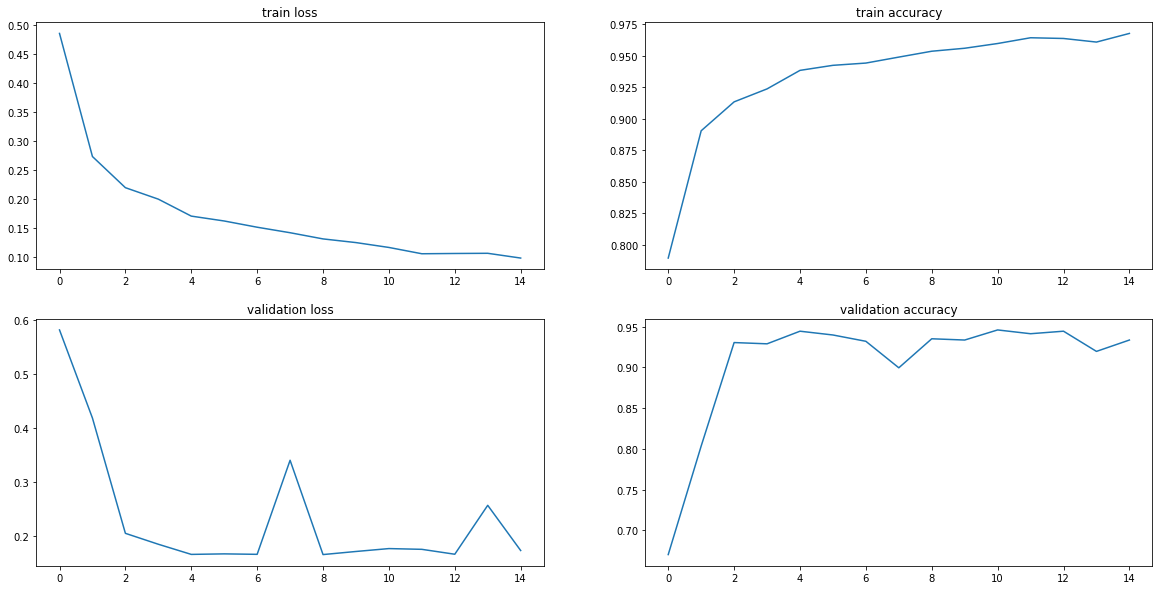

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1760
           1       0.96      0.94      0.95      1468

    accuracy                           0.95      3228
   macro avg       0.96      0.95      0.95      3228
weighted avg       0.95      0.95      0.95      3228

[[1705   55]
 [  92 1376]]
Wyjścia po treningu 10 epok:
[1 0 0 1 0 1 0 1 1 1 0 1 1 0 1 0 1 0 0 1]

Referencyjne wyjścia:
[0 0 0 1 0 0 0 1 1 1 0 1 1 0 1 0 1 0 0 1]


In [59]:
fig, ax = plt.subplots(nrows=2,ncols=2, figsize=(20,10))
# wyświetlamy wykresy
ax[0][0].plot(history07.history["loss"])
ax[0][1].plot(history07.history["accuracy"])
ax[1][0].plot(history07.history["val_loss"])
ax[1][1].plot(history07.history["val_accuracy"])
#nazywamy zdjęcia
ax[0][0].set_title("train loss")
ax[0][1].set_title("train accuracy")
ax[1][0].set_title("validation loss")
ax[1][1].set_title("validation accuracy")
plt.show()

# testowanie
y_pred07 = model07.predict(x_test2)
print(classification_report(y_test2.argmax(axis=1), y_pred07.argmax(axis=1)))
print(confusion_matrix(y_test2.argmax(axis=1), y_pred07.argmax(axis=1)))

print("Wyjścia po treningu {0} epok:\n{1}\n\nReferencyjne wyjścia:\n{2}".format(
    10, 
    y_pred07[:20].argmax(axis=1), 
    y_test2[:20].argmax(axis=1)))

## 8.3 Wizualizacja danych , które model błednie odycztuje

In [60]:
y_pred_classes2 = np.argmax(y_pred07, axis=1) 
y_true2 = np.argmax(y_test2, axis=1)
errors2 = (y_pred_classes2 - y_true2 != 0)

y_pred_classes_errors2 = y_pred_classes2[errors2]
y_pred_errors2 = y_pred07[errors2]
y_true_errors2 = y_true2[errors2]
y_test_errors2 = x_test2[errors2]

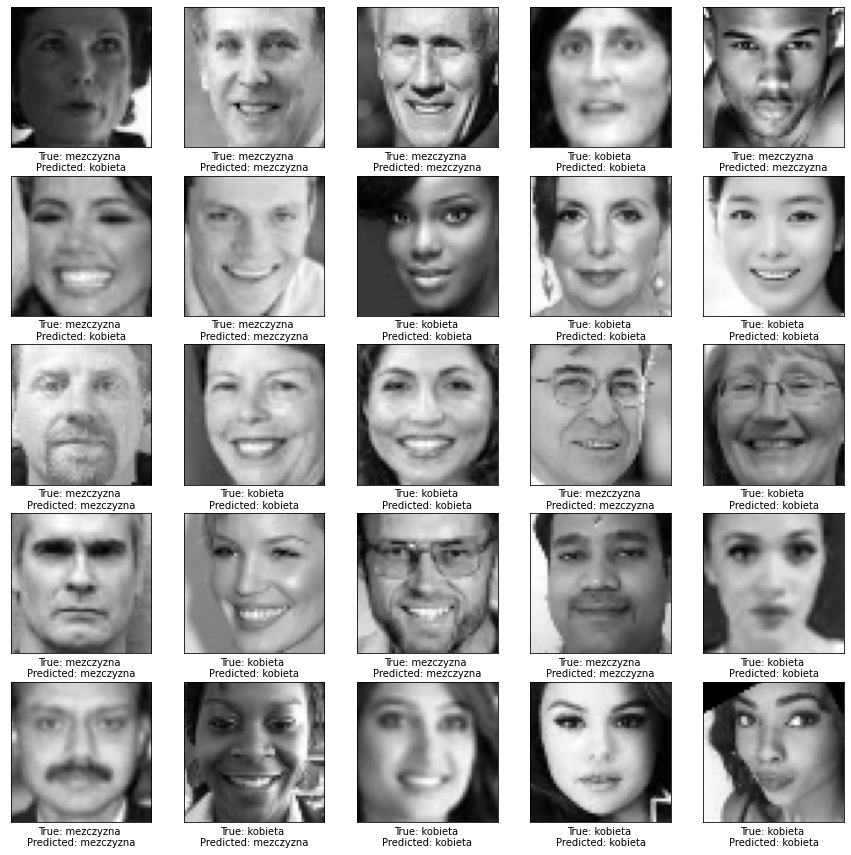

In [66]:
index=np.random.randint(0,10000,25)
plt.figure(figsize=(15,15))

for i in range(len(index)):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test2[i], cmap ="gray")
    plt.xlabel("True: %s \nPredicted: %s" % (labels[y_true2[i]],labels[y_pred_classes2[i]]))
   

    
plt.show()